In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM

In [2]:
df = pd.read_csv("../data/rastro_1min.tar.gz", index_col=0)
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,8.711864,1737.949153,19.737289,17.590780,4.610697e+05,3707.610350,4828.865308,60.033898,2.762712,1251.881356,3.443046,4.184972,150221.559322,434.507309,616.176033,180.135593,165.830508
2016-06-29 22:57:00,10.566667,975.183333,16.470517,15.334160,1.172443e+05,2017.145780,2984.791050,52.000000,1.216667,1407.983333,3.385373,3.600891,149476.666667,373.483436,468.323626,241.600000,187.216667
2016-06-29 22:58:00,14.816667,2018.716667,16.866703,14.328054,3.782617e+05,2655.061443,3775.325510,84.233333,2.650000,2899.116667,6.576329,5.829330,239384.266667,544.011478,561.241565,324.700000,111.933333
2016-06-29 22:59:00,11.166667,1754.000000,18.245522,15.004146,3.280561e+05,2672.386192,3300.962021,66.600000,2.950000,2041.966667,6.762097,5.491740,161850.133333,540.194010,469.583361,239.600000,56.200000
2016-06-29 23:00:00,10.661017,11046.406780,27.337623,13.555662,2.865999e+06,5919.297844,4132.723859,245.203390,18.983051,2109.101695,6.628143,6.706426,195703.457627,596.334224,698.955721,235.627119,78.542373


In [3]:
df.fillna(0, inplace=True)

In [4]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,0.380154,0.045155,0.424465,0.767610,0.032987,0.133019,0.264598,0.066826,0.013455,0.039427,0.078251,0.227991,0.019428,0.043883,0.061486,0.133864,0.209056
2016-06-29 22:57:00,0.461091,0.025337,0.354210,0.669138,0.008388,0.072370,0.163552,0.057883,0.005925,0.044343,0.076940,0.196172,0.019332,0.037720,0.046732,0.179540,0.236017
2016-06-29 22:58:00,0.646545,0.052450,0.362731,0.625235,0.027062,0.095256,0.206869,0.093763,0.012906,0.091305,0.149462,0.317574,0.030959,0.054943,0.056004,0.241294,0.141110
2016-06-29 22:59:00,0.487273,0.045572,0.392383,0.654737,0.023470,0.095878,0.180876,0.074135,0.014367,0.064310,0.153684,0.299182,0.020932,0.054557,0.046858,0.178054,0.070849
2016-06-29 23:00:00,0.465208,0.287008,0.587915,0.591530,0.205044,0.212368,0.226453,0.272944,0.092450,0.066424,0.150640,0.365357,0.025310,0.060227,0.069746,0.175101,0.099015


In [5]:
#model = IsolationForest(n_estimators=500, n_jobs=-1, random_state=0, verbose=1)
#model = LocalOutlierFactor(n_neighbors=100, n_jobs=-1)
model = OneClassSVM(kernel="rbf", verbose=1)

In [6]:
preds = model.fit_predict(df)

[LibSVM]............
*
optimization finished, #iter = 12706
obj = 96690147.352652, rho = 11034.933984
nSV = 21246, nBSV = 21244


In [7]:
anomaly = pd.DataFrame({"anomaly": preds}, index=df.index)
anomaly.head()

,anomaly
overalltime,
2016-06-29 22:56:00,-1
2016-06-29 22:57:00,-1
2016-06-29 22:58:00,-1
2016-06-29 22:59:00,-1
2016-06-29 23:00:00,-1


In [8]:
print(f"anomalies = {(anomaly['anomaly']==-1).sum()} / {len(anomaly)}")

anomalies = 21245 / 42489


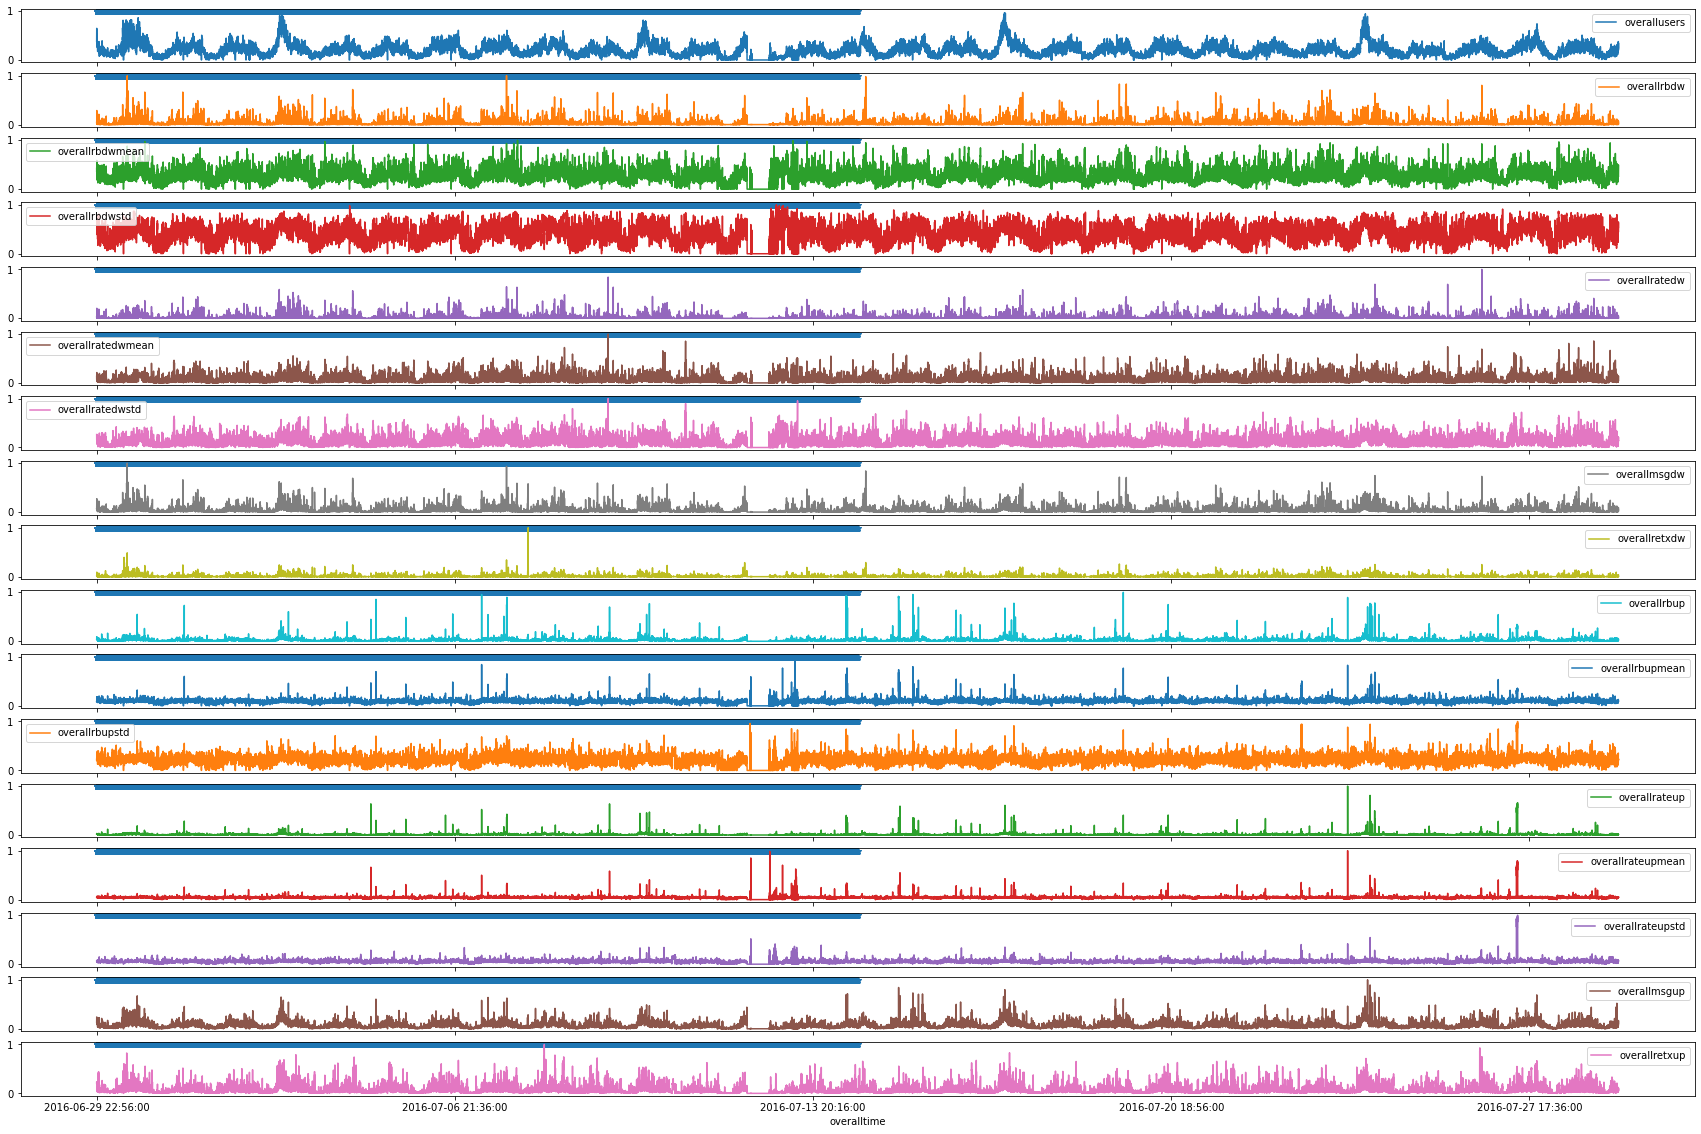

In [9]:
axs = df.plot(subplots=True, sharex=True, figsize=(30,20))
an = anomaly[anomaly["anomaly"]==-1].index
for ax in axs:
    ax.scatter(x=an, y=[1 for i in range(len(an))], marker="*")
plt.show()